<a href="https://colab.research.google.com/github/ramandeep05252/VicCrash/blob/main/VICRASH_BLACKSPOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VicCrashAnalytics
Objective: VicCrashAnalytics conuslting contract for Victorian government's department of transport regarding the factors that contribute to blackspots.

By- Ramandeep Kaur



## 1.Business understandings, problem, solution and recommendations
Dataset: Blackspot.csv

Aim: ViCrashAnalytics aims at predicting the Blackspots according to the dataset provided by Department of Transport on the basis of variables regarding the demographics of surrounding road segments.

Blackspots would be considered as the label for logistic regression model being employed.

By prioritizing targeted solutions such as creating awareness, better traffic signals and policy reforms, VicCrashAnalytics aim at creating a safer road environment and prevent accidents effectively.

## 2.Data understanding, preparation, explorations and visualisation

Aim: To demonstrate our understanding of data provided by DOT and reporting meaningful insights emerging from dataset.

## **2.1 Importing Libraries**

In [ ]:
# Importing libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Importing train_test_split function
from sklearn import metrics #scikit-learn metrics module for model evaluation
from sklearn.metrics import precision_recall_curve, precision_recall_curve, classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

## **2.2 Loading and Inspecting Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading dataset
records_A1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML A1/Blackspot.csv")

#exploring the dataset
print(records_A1)

print('Sample size:', records_A1.shape[0])
print('Number of columns:', records_A1.shape[1])

        ID               EZI_ROAD_NAME              ROAD_NAME ROAD_TYPE  \
0     3699                  GROVE ROAD                  GROVE      ROAD   
1      576          BACCHUS MARSH ROAD          BACCHUS MARSH      ROAD   
2      758                GRUBBED ROAD                GRUBBED      ROAD   
3       89                VIGOR STREET                  VIGOR    STREET   
4     8773                FAIRMAN ROAD                FAIRMAN      ROAD   
...    ...                         ...                    ...       ...   
5321   256  WARBURTON-WOODS POINT ROAD  WARBURTON-WOODS POINT      ROAD   
5322  5182             GLENELG HIGHWAY                GLENELG   HIGHWAY   
5323  4196          CAPE PATERSON ROAD          CAPE PATERSON      ROAD   
5324  4352                MCPHANS ROAD                MCPHANS      ROAD   
5325   223                 ROGERS ROAD                 ROGERS      ROAD   

      AGE_LESS_THAN_15YRS_PCNT  AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  \
0                        0.

In [ ]:
print(records_A1.info())
print(records_A1.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               5326 non-null   int64  
 1   EZI_ROAD_NAME                    5326 non-null   object 
 2   ROAD_NAME                        5326 non-null   object 
 3   ROAD_TYPE                        5326 non-null   object 
 4   AGE_LESS_THAN_15YRS_PCNT         5326 non-null   float64
 5   AGE_15_24YRS_PCNT                5326 non-null   float64
 6   AGE_25_44YRS_PCNT                5326 non-null   float64
 7   AGE_45_64YRS_PCNT                5326 non-null   float64
 8   AGE_18YRS_OVER_PCNT              5326 non-null   float64
 9   AGE_65YRS_OVER_PCNT              5317 non-null   float64
 10  SEO_PERSONS_PCNT                 5326 non-null   float64
 11  FC_COUPLE_NO_CHILDREN_PCNT       5326 non-null   float64
 12  FC_COUPLE_WITH_CHILD

### **Inspecting and treating missing data**

In [ ]:
print(records_A1.isnull().sum().sort_values(ascending=0))

AGE_65YRS_OVER_PCNT                9
Lq_Licenses                        6
Primary_Production%                0
OCCUPATION_BLUE_COLLAR_PCNT        0
SEIFA                              0
Commercial%                        0
Industrial%                        0
Residential%                       0
Parkland%                          0
ID                                 0
DWELLING_FLAT_UNIT_APART_PCNT      0
Intersection                       0
Supermarket                        0
primary_school                     0
secondary_school                   0
km_post                            0
traffic_signal                     0
OCCUPATION_WHITE_COLLAR_PCNT       0
DWELLING_SEMID_RO_OR_TCE_H_TH_P    0
EZI_ROAD_NAME                      0
AGE_18YRS_OVER_PCNT                0
ROAD_NAME                          0
ROAD_TYPE                          0
AGE_LESS_THAN_15YRS_PCNT           0
AGE_15_24YRS_PCNT                  0
AGE_25_44YRS_PCNT                  0
AGE_45_64YRS_PCNT                  0
S

In [ ]:
# Replacing empty strings (" ") with NaN
records_A1.replace(" ", pd.NA, inplace=True)

<Axes: xlabel='AGE_65YRS_OVER_PCNT', ylabel='Count'>

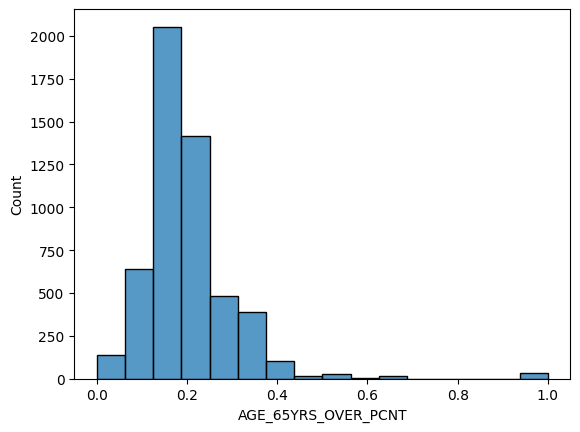

In [ ]:
sns.histplot(data= records_A1, x='AGE_65YRS_OVER_PCNT', bins= 16)

<Axes: xlabel='AGE_65YRS_OVER_PCNT'>

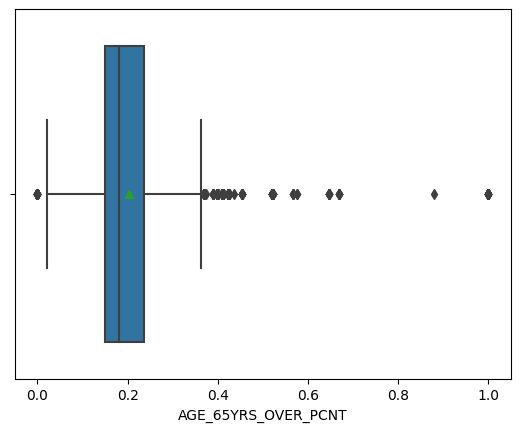

In [ ]:
Box_Bin= 0.8
sns.boxplot(data=records_A1, x='AGE_65YRS_OVER_PCNT', showmeans=True, width= Box_Bin)

In [ ]:
records_A1['Lq_Licenses'].describe()

count   5320.000
mean       0.378
std        1.551
min        0.000
25%        0.000
50%        0.000
75%        0.000
max       26.000
Name: Lq_Licenses, dtype: float64

<Axes: xlabel='Lq_Licenses', ylabel='Count'>

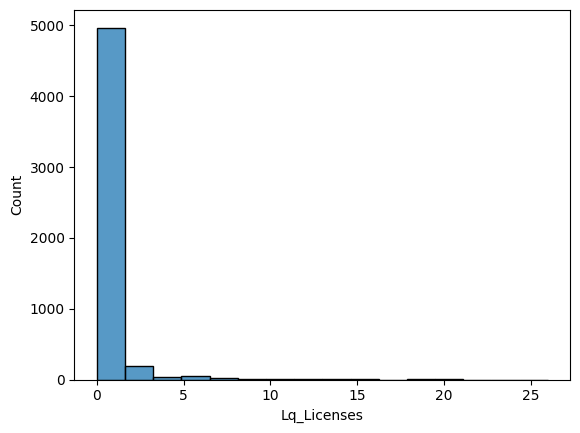

In [ ]:
sns.histplot(data= records_A1, x='Lq_Licenses', bins= 16)

In [ ]:
#Fill in missing numerical data with median
records_A1['AGE_65YRS_OVER_PCNT'].fillna(records_A1['AGE_65YRS_OVER_PCNT'].median(),inplace=True)
records_A1['Lq_Licenses'].fillna(records_A1['Lq_Licenses'].median(), inplace=True)



In [ ]:
print(records_A1.isnull().sum().sort_values(ascending=0))

ID                                 0
EZI_ROAD_NAME                      0
OCCUPATION_WHITE_COLLAR_PCNT       0
OCCUPATION_BLUE_COLLAR_PCNT        0
SEIFA                              0
Commercial%                        0
Industrial%                        0
Residential%                       0
Parkland%                          0
Primary_Production%                0
Lq_Licenses                        0
Intersection                       0
Supermarket                        0
primary_school                     0
secondary_school                   0
km_post                            0
traffic_signal                     0
DWELLING_FLAT_UNIT_APART_PCNT      0
DWELLING_SEMID_RO_OR_TCE_H_TH_P    0
DWELLING_SEP_HOUSE_PCNT            0
AGE_18YRS_OVER_PCNT                0
ROAD_NAME                          0
ROAD_TYPE                          0
AGE_LESS_THAN_15YRS_PCNT           0
AGE_15_24YRS_PCNT                  0
AGE_25_44YRS_PCNT                  0
AGE_45_64YRS_PCNT                  0
A

### **Converting Categorical variables to Numerical**

In [ ]:
## Cretaing a new column 'Blackspot_N' for numerical values
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

records_A1['Blackspot_N'] = encoder.fit_transform(records_A1['Blackspot'])

print(records_A1.sample(10))

        ID        EZI_ROAD_NAME       ROAD_NAME ROAD_TYPE  \
3903  6590         MUNRO STREET           MUNRO    STREET   
1242  6660        CAMERONS ROAD        CAMERONS      ROAD   
3659  2852       BANKSIA STREET         BANKSIA    STREET   
3134  1884        BREAMLEA ROAD        BREAMLEA      ROAD   
17    8885      GLENELG HIGHWAY         GLENELG   HIGHWAY   
5143  7283      TENNYSON STREET        TENNYSON    STREET   
5024  8535           KELLY ROAD           KELLY      ROAD   
2560   329         HALLETTS WAY        HALLETTS       WAY   
2548  9486        DIAMONDS ROAD        DIAMONDS      ROAD   
2057  5153  COLAC-BALLARAT ROAD  COLAC-BALLARAT      ROAD   

      AGE_LESS_THAN_15YRS_PCNT  AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  \
3903                     0.191              0.138              0.253   
1242                     0.270              0.129              0.215   
3659                     0.106              0.058              0.111   
3134                     0.163          

In [ ]:
## Cretaing a new column 'Intersection_N' for numerical values

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

records_A1['Intersection_N'] = encoder.fit_transform(records_A1['Intersection'])

print(records_A1.sample(10))

        ID     EZI_ROAD_NAME    ROAD_NAME ROAD_TYPE  AGE_LESS_THAN_15YRS_PCNT  \
3487  9724    ANDERSONS ROAD    ANDERSONS      ROAD                     0.222   
4555  6954      CROSS STREET        CROSS    STREET                     0.193   
4696  6234      PEARSON ROAD      PEARSON      ROAD                     0.207   
4070  9498      SHIRLEY ROAD      SHIRLEY      ROAD                     0.178   
591   9445  MAIN NEERIM ROAD  MAIN NEERIM      ROAD                     0.153   
4773  4221    OVERLOOK DRIVE     OVERLOOK     DRIVE                     0.176   
261   3355      VENTNOR ROAD      VENTNOR      ROAD                     0.210   
955   3659        EMILY ROAD        EMILY      ROAD                     0.133   
4025  1068  LOCH VALLEY ROAD  LOCH VALLEY      ROAD                     0.097   
3302  7072      BISHOPS ROAD      BISHOPS      ROAD                     0.196   

      AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  AGE_45_64YRS_PCNT  \
3487              0.052              0.181 

In [ ]:
## Displaying change in datatype of the categorical variables along with others
records_A1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               5326 non-null   int64  
 1   EZI_ROAD_NAME                    5326 non-null   object 
 2   ROAD_NAME                        5326 non-null   object 
 3   ROAD_TYPE                        5326 non-null   object 
 4   AGE_LESS_THAN_15YRS_PCNT         5326 non-null   float64
 5   AGE_15_24YRS_PCNT                5326 non-null   float64
 6   AGE_25_44YRS_PCNT                5326 non-null   float64
 7   AGE_45_64YRS_PCNT                5326 non-null   float64
 8   AGE_18YRS_OVER_PCNT              5326 non-null   float64
 9   AGE_65YRS_OVER_PCNT              5326 non-null   float64
 10  SEO_PERSONS_PCNT                 5326 non-null   float64
 11  FC_COUPLE_NO_CHILDREN_PCNT       5326 non-null   float64
 12  FC_COUPLE_WITH_CHILD

## **2.3 Exploratory Data Analysis EDA**


Univariate analysis

Bivariate analysis

Multivariate analysis

## Univariate Analysis

In [ ]:
#Overview of floating numbers, setting the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.3f' % x)

data_types =['object', 'float', 'int']
records_A1.describe(include=data_types)

,ID,EZI_ROAD_NAME,ROAD_NAME,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_18YRS_OVER_PCNT,AGE_65YRS_OVER_PCNT,...,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal,Blackspot,Blackspot_N,Intersection_N
count,5326.000,5326,5326,5326,5326.000,5326.000,5326.000,5326.000,5326.000,5326.000,...,5326.000,5326,5326.000,5326.000,5326.000,5326.000,5326.000,5326,5326.000,5326.000
unique,NaN,2185,2020,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
top,NaN,BASS HIGHWAY,PRINCES,ROAD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,non-Intersection,NaN,NaN,NaN,NaN,NaN,non-Blackspot,NaN,NaN
freq,NaN,52,75,3400,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4659,NaN,NaN,NaN,NaN,NaN,4759,NaN,NaN
mean,4996.381,NaN,NaN,NaN,0.175,0.100,0.203,0.307,0.774,0.202,...,0.378,NaN,0.013,0.026,0.005,0.127,0.022,NaN,0.894,0.875
std,2885.736,NaN,NaN,NaN,0.051,0.031,0.055,0.068,0.102,0.105,...,1.550,NaN,0.111,0.158,0.067,0.334,0.148,NaN,0.308,0.331
min,1.000,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,NaN,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000
25%,2477.000,NaN,NaN,NaN,0.145,0.080,0.172,0.274,0.752,0.149,...,0.000,NaN,0.000,0.000,0.000,0.000,0.000,NaN,1.000,1.000
50%,5020.500,NaN,NaN,NaN,0.177,0.102,0.197,0.317,0.779,0.181,...,0.000,NaN,0.000,0.000,0.000,0.000,0.000,NaN,1.000,1.000
75%,7478.750,NaN,NaN,NaN,0.206,0.123,0.234,0.348,0.816,0.237,...,0.000,NaN,0.000,0.000,0.000,0.000,0.000,NaN,1.000,1.000


 **Visualising Numerical variables**

Numerical Variables: ['AGE_LESS_THAN_15YRS_PCNT', 'AGE_15_24YRS_PCNT', 'AGE_25_44YRS_PCNT', 'AGE_45_64YRS_PCNT', 'AGE_18YRS_OVER_PCNT', 'AGE_65YRS_OVER_PCNT']


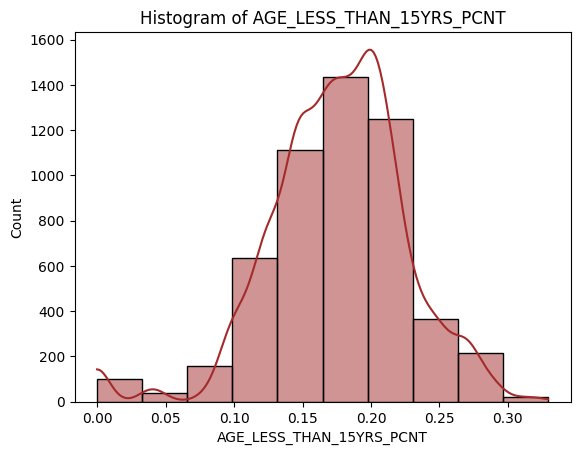

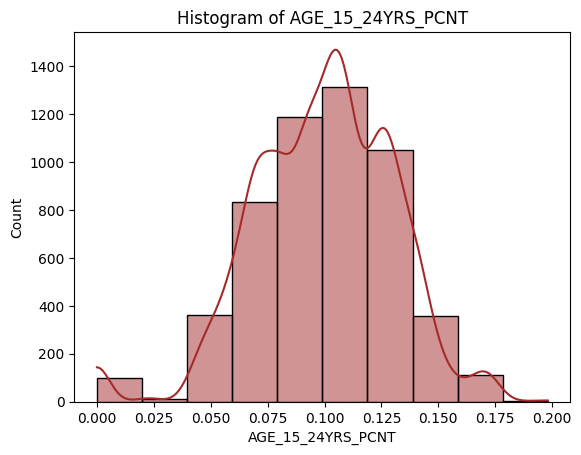

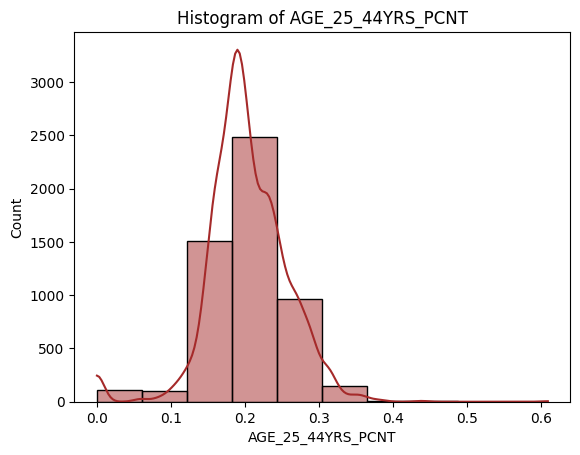

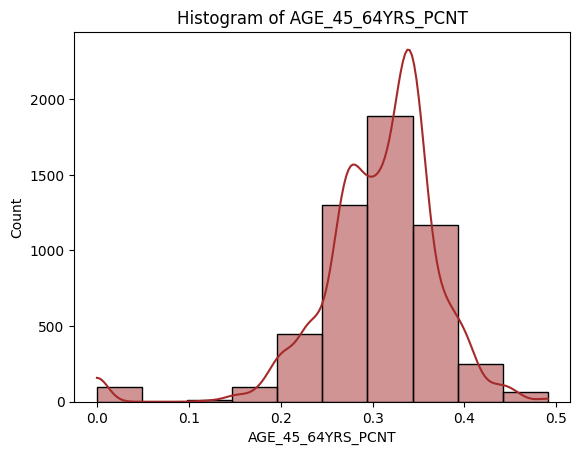

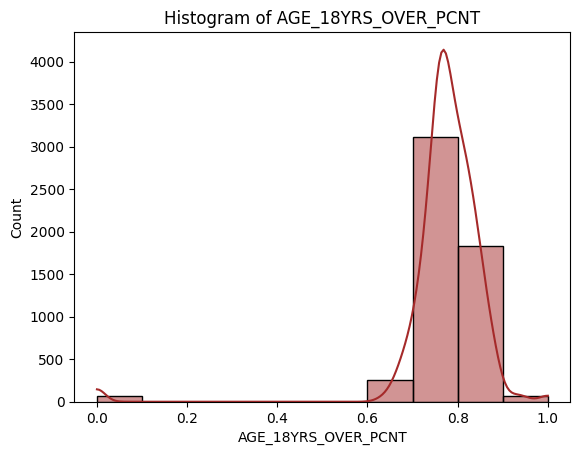

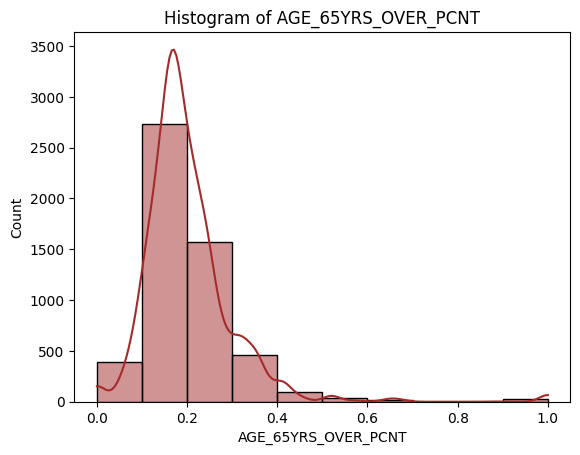

In [ ]:
#using seaborn https://seaborn.pydata.org/generated/seaborn.histplot.html
# Using the numerical variables from the dataset
numerical_variables = ['AGE_LESS_THAN_15YRS_PCNT', 'AGE_15_24YRS_PCNT', 'AGE_25_44YRS_PCNT', 'AGE_45_64YRS_PCNT', 'AGE_18YRS_OVER_PCNT', 'AGE_65YRS_OVER_PCNT']

# Printing the list of numerical variables
print("Numerical Variables:", numerical_variables)

# Displaying histograms using seaborn
for variable in numerical_variables:
    sns.histplot(data=records_A1, x=variable, bins= 10, kde= True, color='brown')
    plt.title(f"Histogram of {variable}")
    plt.show()


Numerical Variables: ['CARS_ZERO_HH_PCNT', 'CARS_ONE_HH_PCNT', 'CARS_TWO_OR_MORE_HH_PCNT']


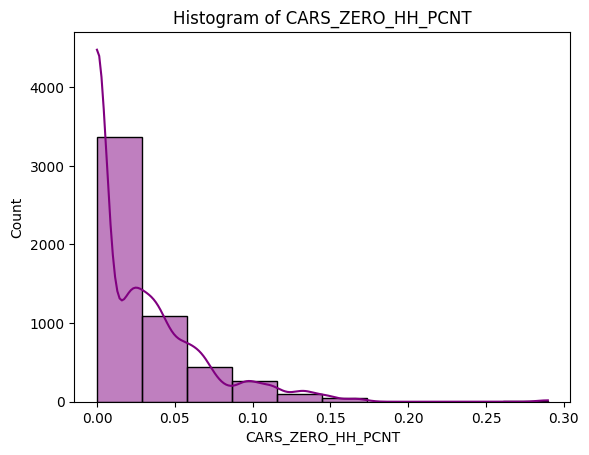

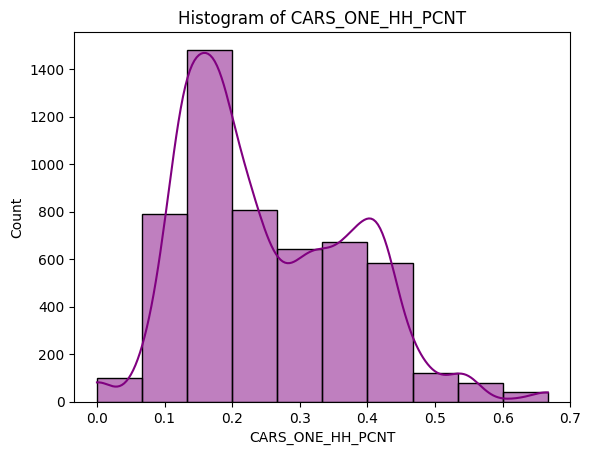

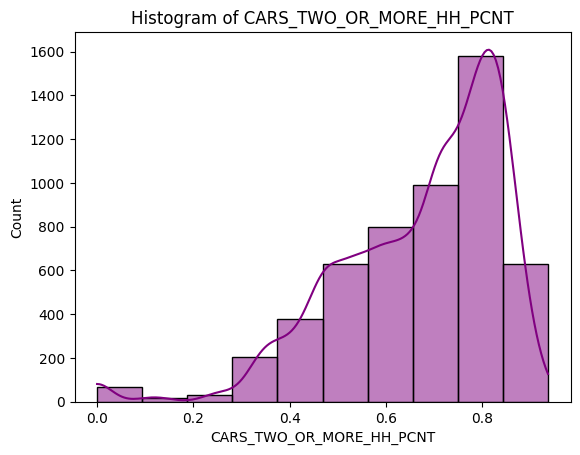

In [ ]:
#using seaborn https://seaborn.pydata.org/generated/seaborn.histplot.html
# Using the numerical variables from the dataset
numerical_variables = ['CARS_ZERO_HH_PCNT', 'CARS_ONE_HH_PCNT', 'CARS_TWO_OR_MORE_HH_PCNT']

# Printing the list of numerical variables
print("Numerical Variables:", numerical_variables)

# Displaying histograms using seaborn
for variable in numerical_variables:
    sns.histplot(data=records_A1, x=variable, bins= 10, kde= True, color= 'purple')
    plt.title(f"Histogram of {variable}")
    plt.show()


Numerical Variables: ['Commercial%', 'Industrial%', 'Residential%', 'Parkland%', 'Primary_Production%', 'Lq_Licenses']


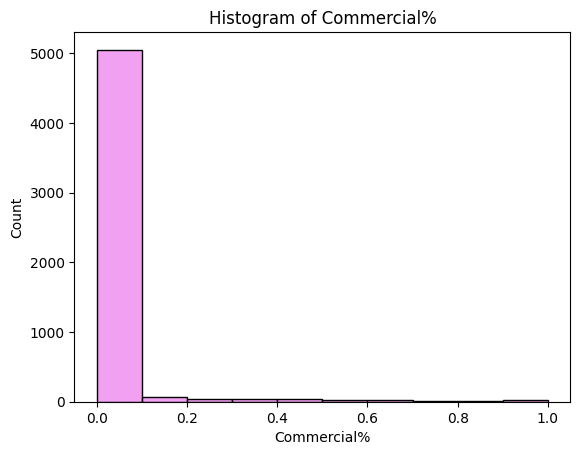

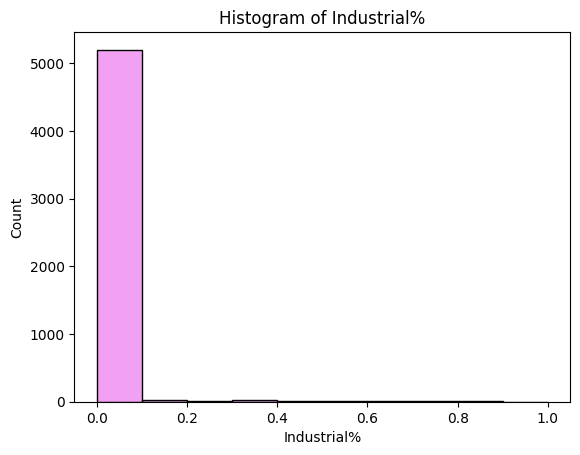

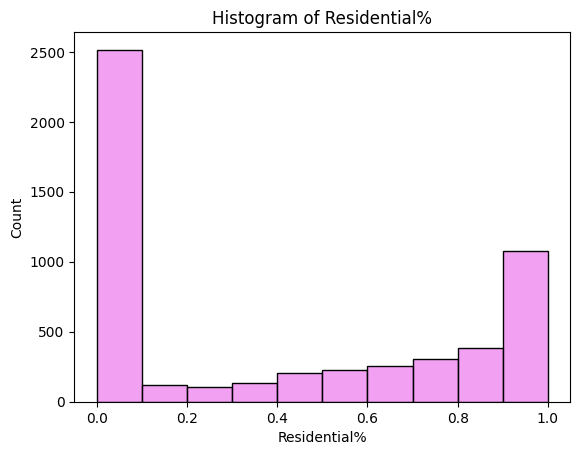

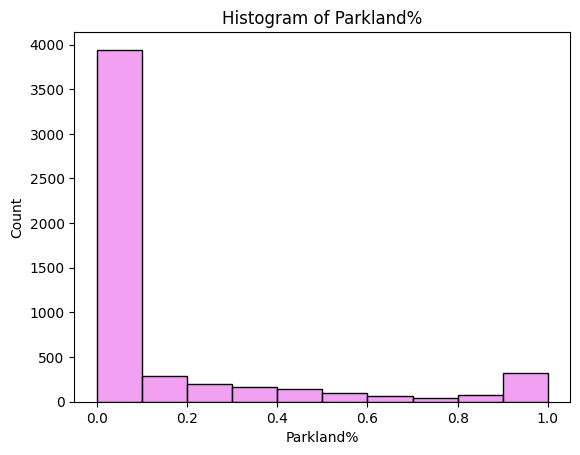

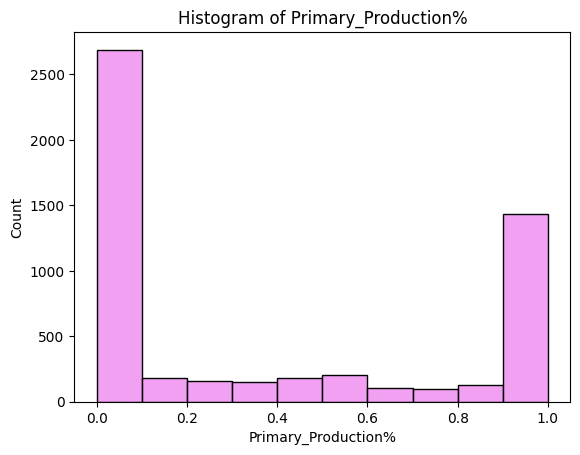

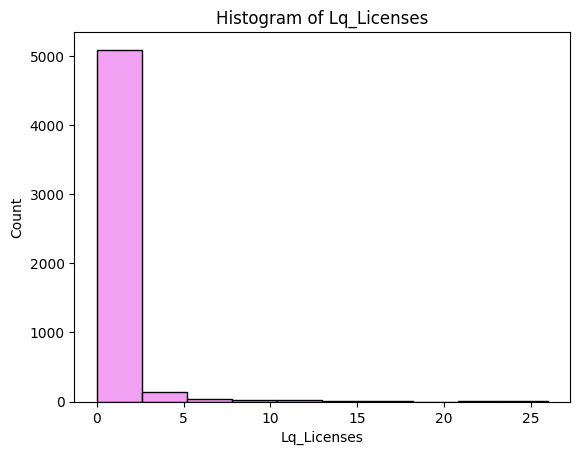

In [ ]:
#using seaborn https://seaborn.pydata.org/generated/seaborn.histplot.html
# using the numerical variables from the dataset
numerical_variables = ['Commercial%',	'Industrial%',	'Residential%',	'Parkland%',	'Primary_Production%',	'Lq_Licenses']

# Printing the list of numerical variables
print("Numerical Variables:", numerical_variables)

# Displaying histograms using seaborn
for variable in numerical_variables:
    sns.histplot(data=records_A1, x=variable, bins= 10, color= 'violet')
    plt.title(f"Histogram of {variable}")
    plt.show()

Numerical Variables: ['Supermarket', 'primary_school', 'secondary_school', 'km_post', 'traffic_signal']


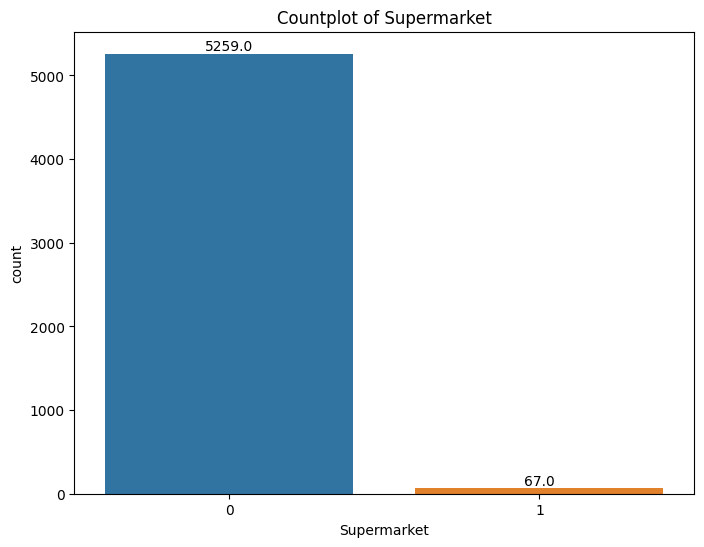

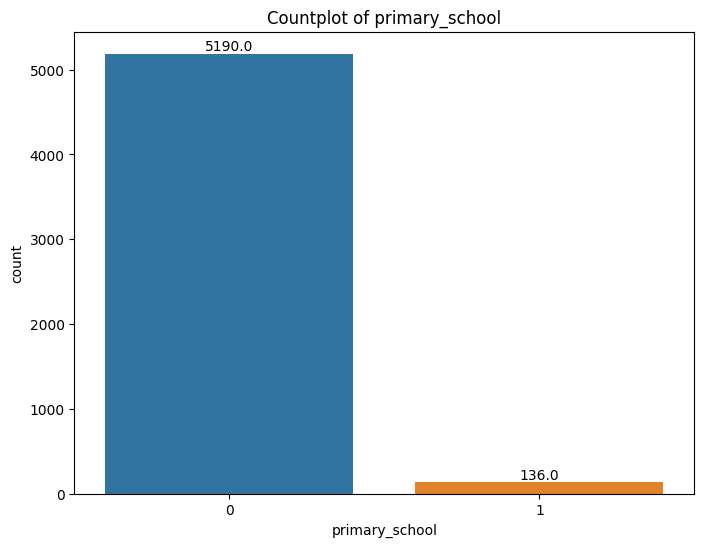

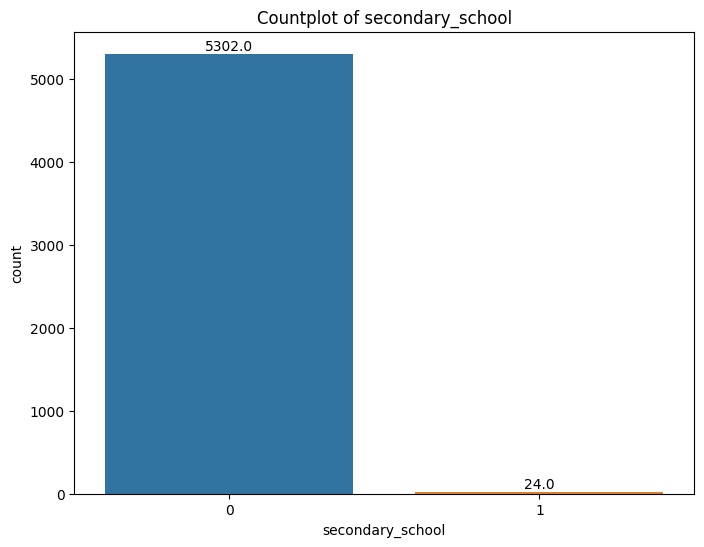

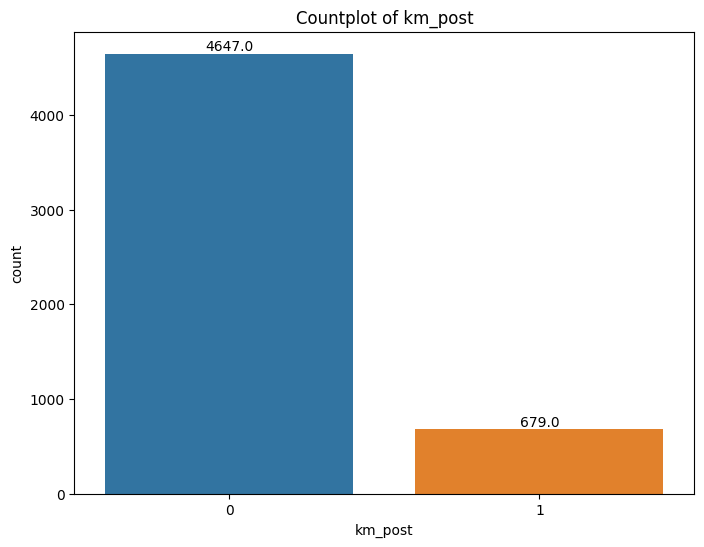

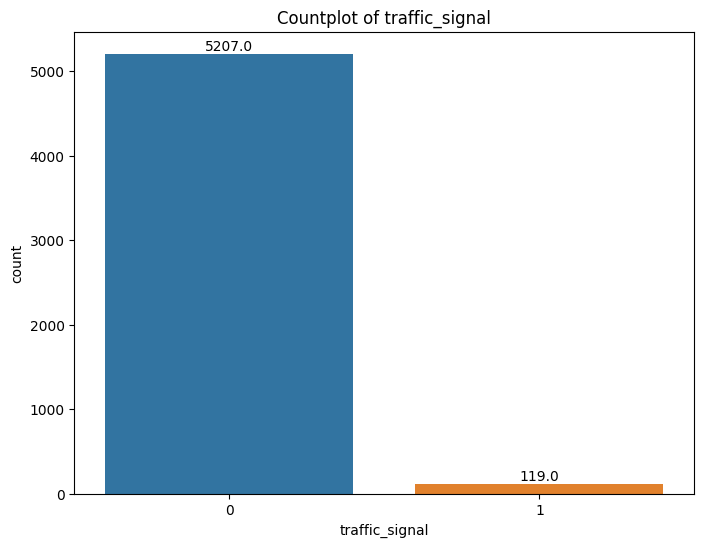

In [ ]:
# Using countplots to visualise the distribution of numerical variables below
numerical_variables = ['Supermarket', 'primary_school', 'secondary_school', 'km_post', 'traffic_signal']

# Printing the list of numerical variables
print("Numerical Variables:", numerical_variables)

# Displaying histograms using seaborn
for variable in numerical_variables:
    plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
    ax = sns.countplot(data=records_A1, x=variable)
    plt.title(f"Countplot of {variable}")

    # Adding count labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.show()

In [ ]:
print(records_A1['ROAD_TYPE'].value_counts())

ROAD       3400
STREET     1324
DRIVE       295
HIGHWAY     180
WAY          77
FREEWAY      50
Name: ROAD_TYPE, dtype: int64


In [ ]:
records_A1['ROAD_TYPE'].describe()

count     5326
unique       6
top       ROAD
freq      3400
Name: ROAD_TYPE, dtype: object

In [ ]:
print(records_A1['Blackspot'].value_counts())

non-Blackspot    4759
Blackspot         567
Name: Blackspot, dtype: int64


In [ ]:
records_A1['Blackspot'].describe()

count              5326
unique                2
top       non-Blackspot
freq               4759
Name: Blackspot, dtype: object

In [ ]:
print(records_A1['Intersection'].value_counts())

non-Intersection    4659
Intersection         667
Name: Intersection, dtype: int64


In [ ]:
records_A1['Intersection'].describe()

count                 5326
unique                   2
top       non-Intersection
freq                  4659
Name: Intersection, dtype: object

 **Visualising Categorical variable**

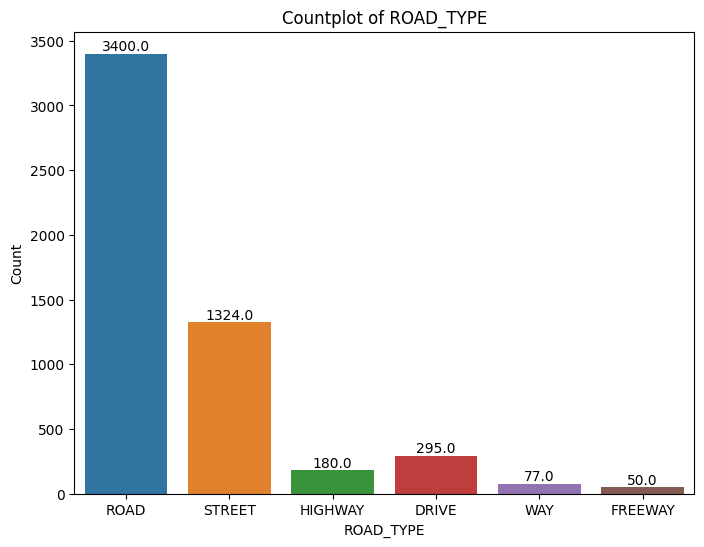

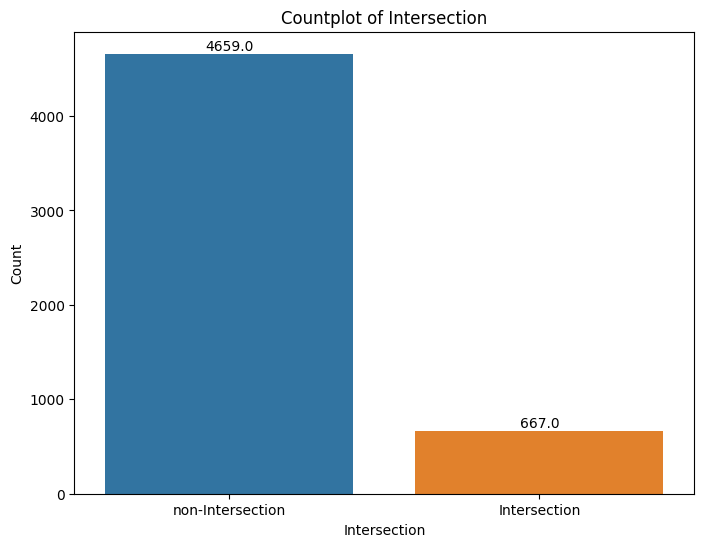

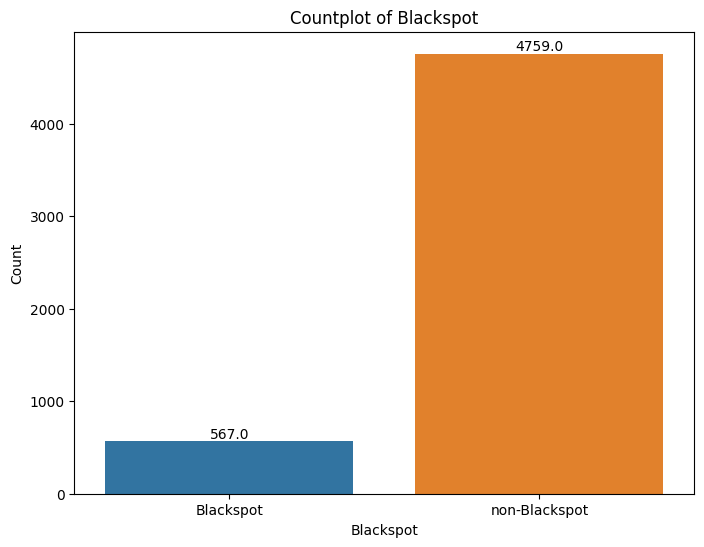

In [ ]:
cat_variables = ['ROAD_TYPE', 'Intersection', 'Blackspot']

for i in cat_variables:
    plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
    ax = sns.countplot(x=records_A1[i])

    # Adding count labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title(f'Countplot of {i}')
    plt.show()


## Bivariate Analysis

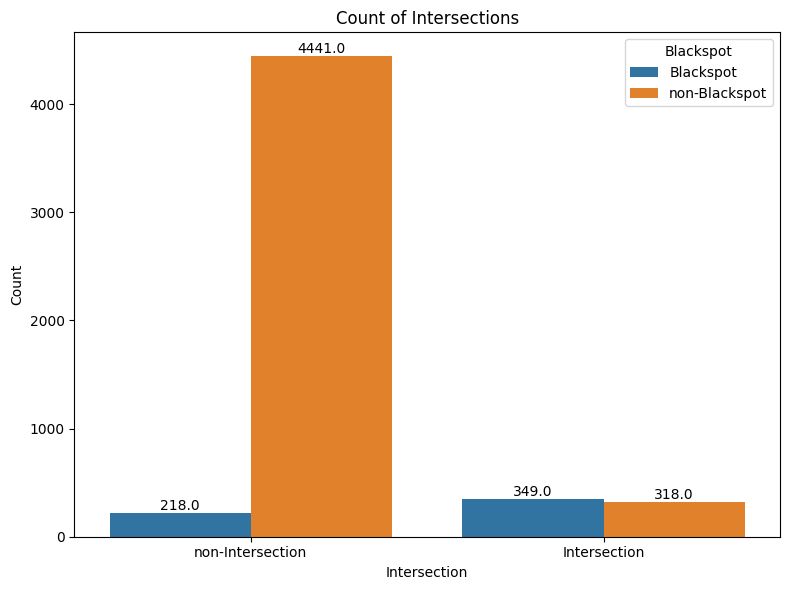

In [ ]:
# 0= non-Blackspot and 1= Blackspot as defined above
#  x=='Intersection': return 1 or x== 'non-Intersection': return 0

#sns.countplot(data=records_A1, x='Intersection', hue='Blackspot')

plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability

# Create the countplot
ax = sns.countplot(data=records_A1, x='Intersection', hue='Blackspot')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Count of Intersections')
plt.xlabel('Intersection')
plt.ylabel('Count')
plt.legend(title='Blackspot')
plt.tight_layout()  # Ensures proper spacing between elements
plt.show()

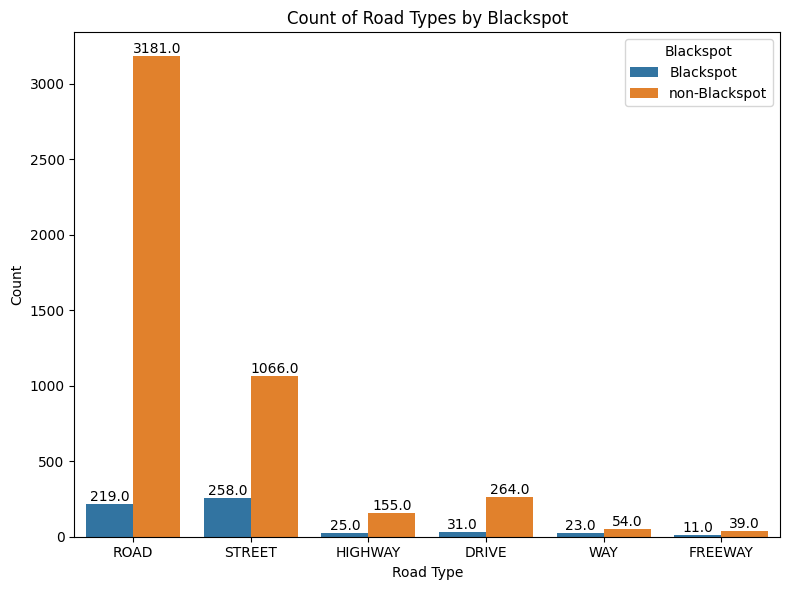

In [ ]:
#sns.countplot(data=records_A1, x='Intersection', hue='Blackspot')
# if x=='Blackspot': return 1 or x=='non-Blackspot': return 0


plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability

# Creating the countplot
ax = sns.countplot(data=records_A1, x='ROAD_TYPE', hue='Blackspot')

# Adding count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Count of Road Types by Blackspot')
plt.xlabel('Road Type')
plt.ylabel('Count')
plt.legend(title='Blackspot')
plt.tight_layout()  # Ensures proper spacing between elements
plt.show()

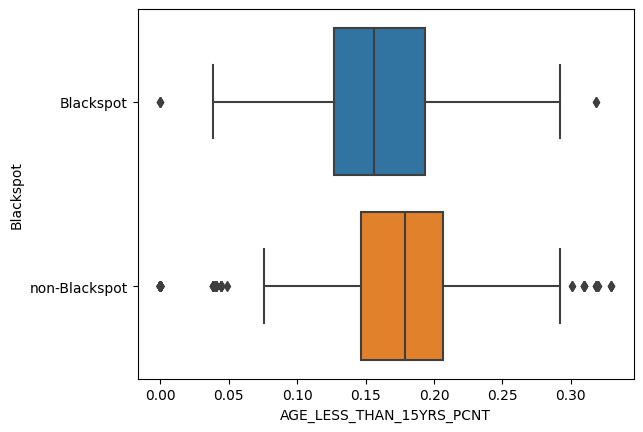

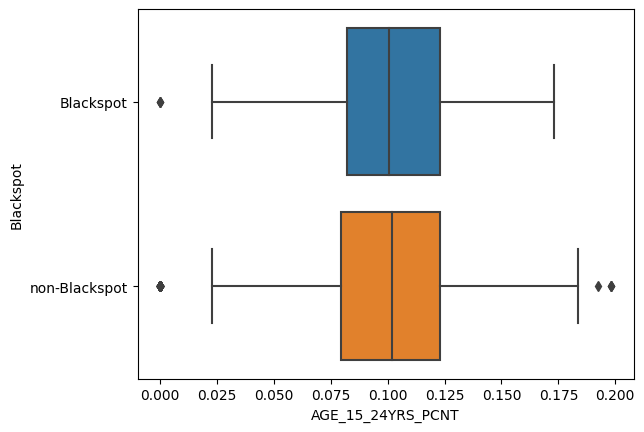

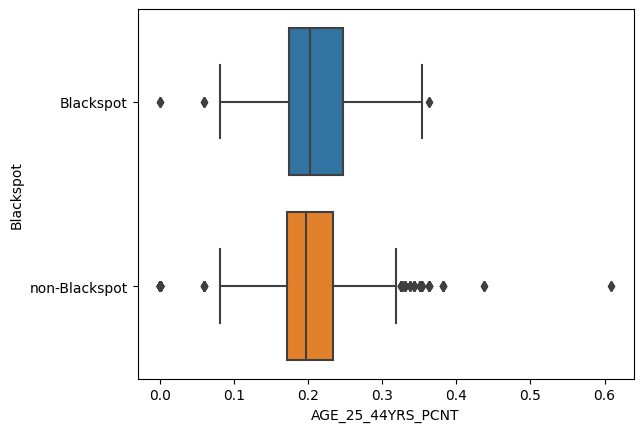

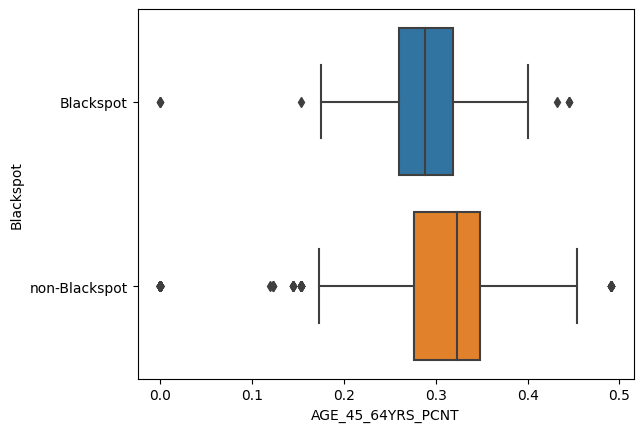

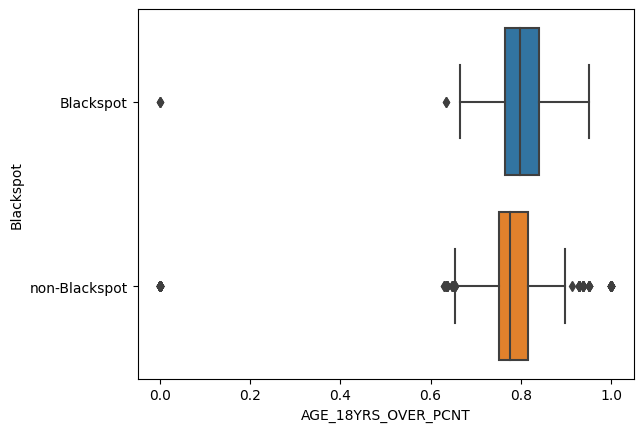

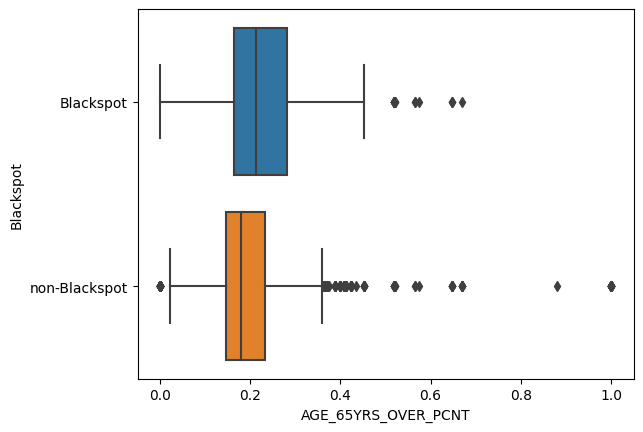

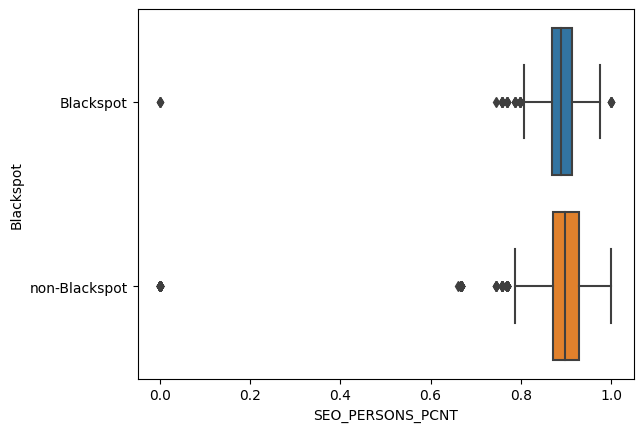

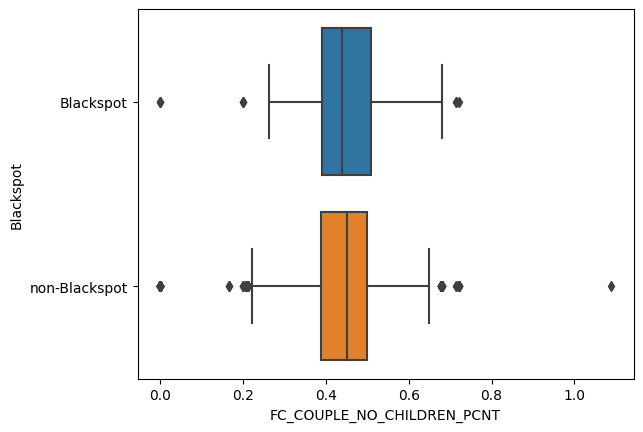

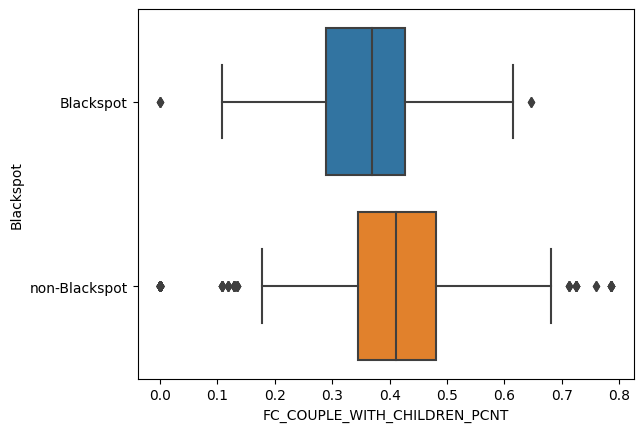

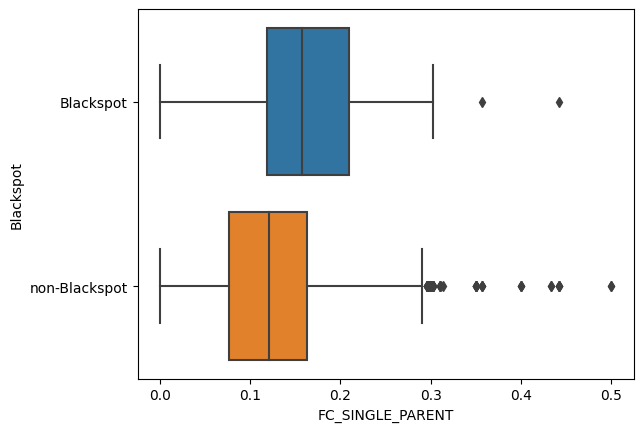

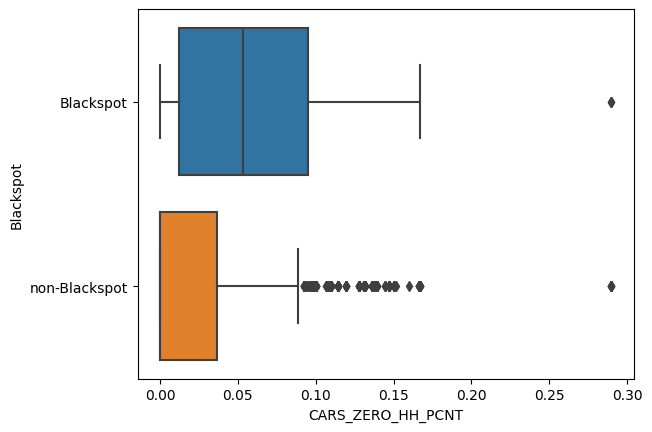

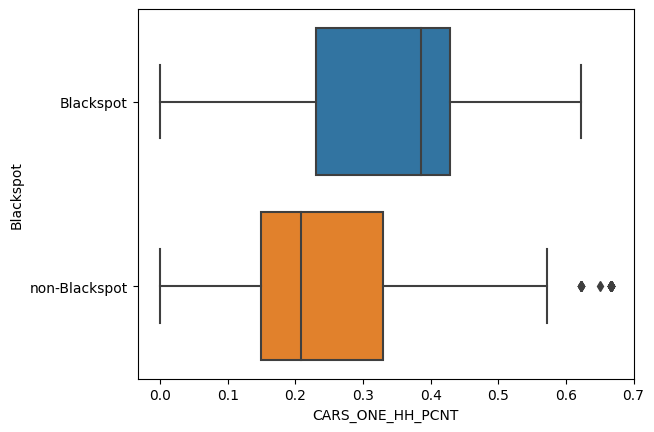

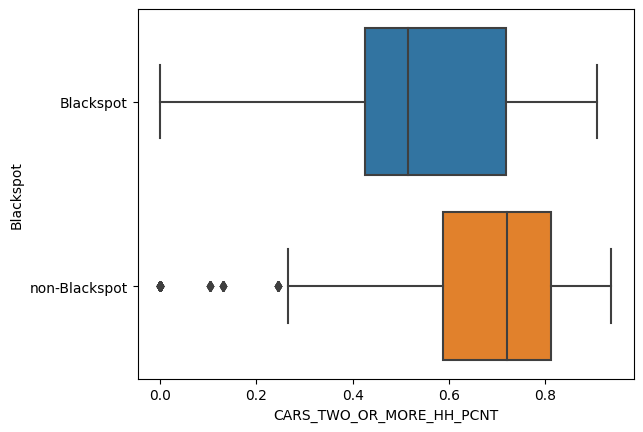

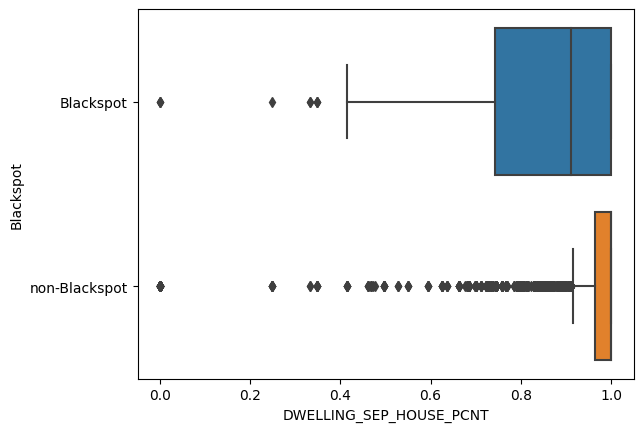

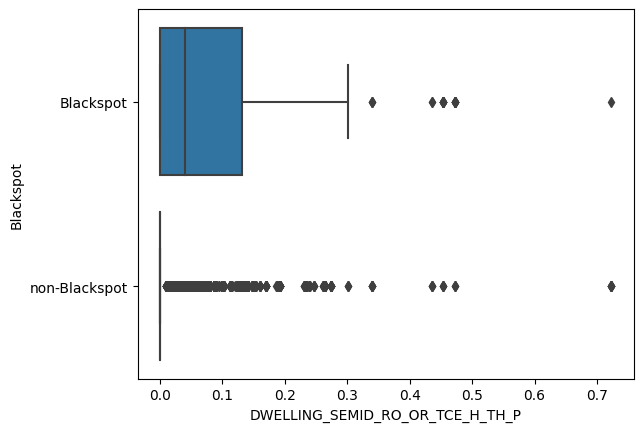

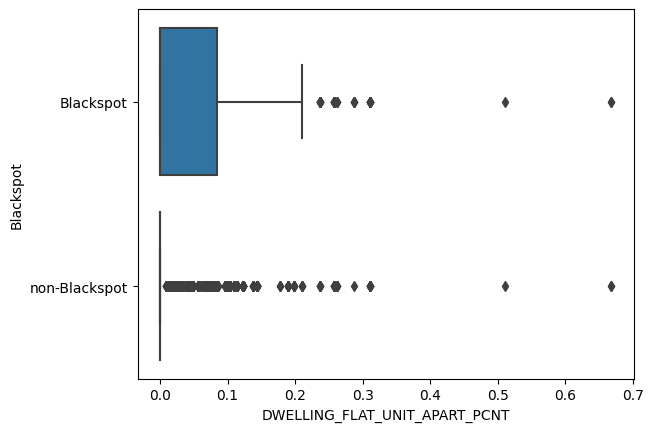

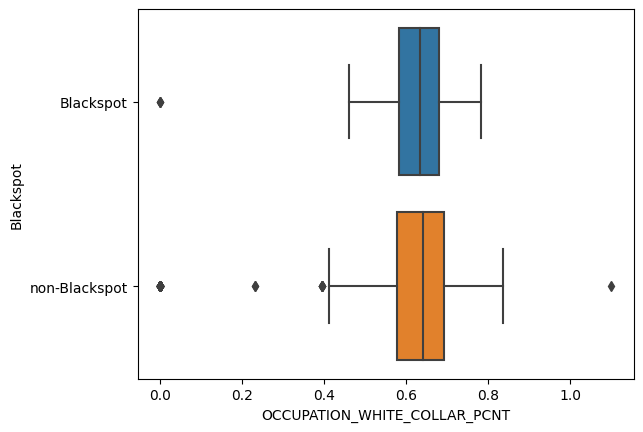

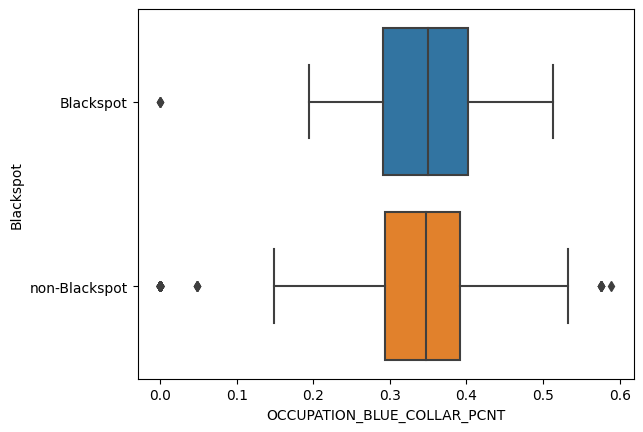

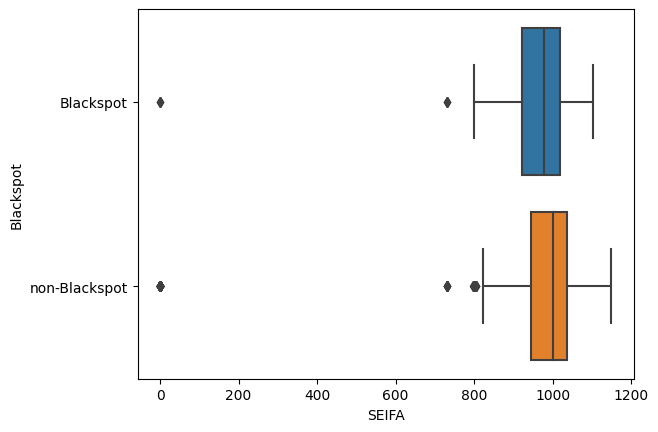

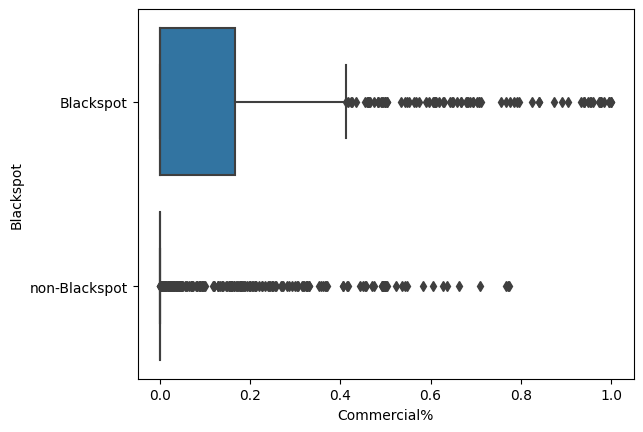

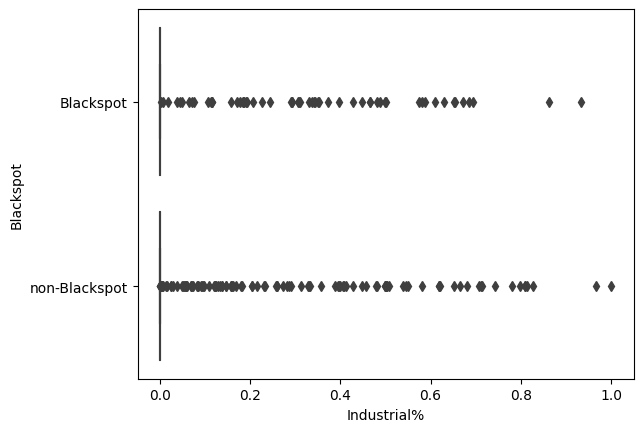

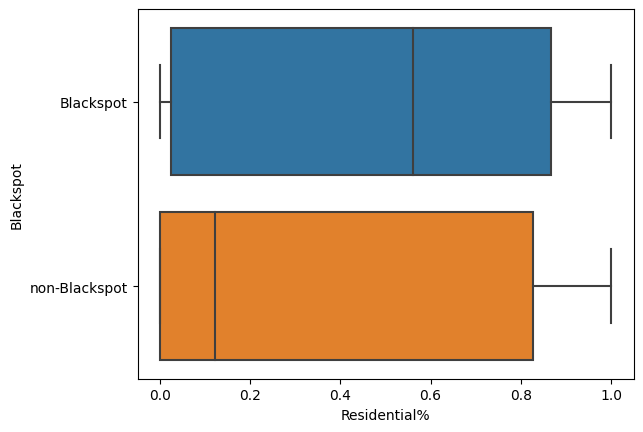

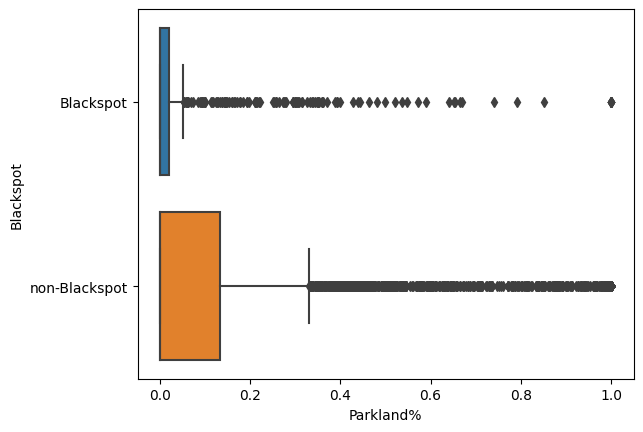

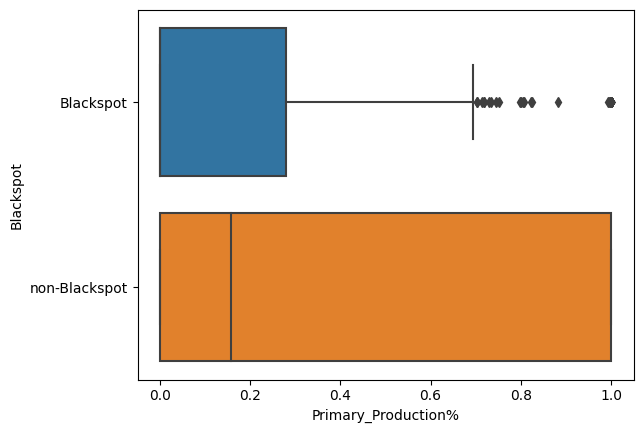

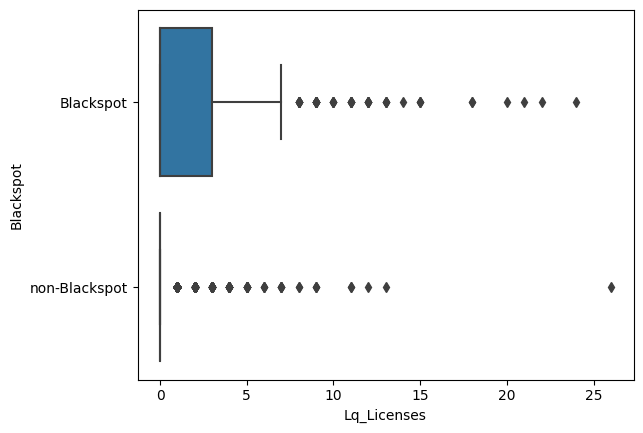

In [ ]:
num_variables=[
       'AGE_LESS_THAN_15YRS_PCNT', 'AGE_15_24YRS_PCNT', 'AGE_25_44YRS_PCNT',
       'AGE_45_64YRS_PCNT', 'AGE_18YRS_OVER_PCNT', 'AGE_65YRS_OVER_PCNT',
       'SEO_PERSONS_PCNT', 'FC_COUPLE_NO_CHILDREN_PCNT',
       'FC_COUPLE_WITH_CHILDREN_PCNT', 'FC_SINGLE_PARENT', 'CARS_ZERO_HH_PCNT',
       'CARS_ONE_HH_PCNT', 'CARS_TWO_OR_MORE_HH_PCNT',
       'DWELLING_SEP_HOUSE_PCNT', 'DWELLING_SEMID_RO_OR_TCE_H_TH_P',
       'DWELLING_FLAT_UNIT_APART_PCNT', 'OCCUPATION_WHITE_COLLAR_PCNT',
       'OCCUPATION_BLUE_COLLAR_PCNT', 'SEIFA', 'Commercial%', 'Industrial%',
       'Residential%', 'Parkland%', 'Primary_Production%', 'Lq_Licenses']
for i in num_variables:
    sns.boxplot(data= records_A1, x=i, y= 'Blackspot')
    plt.show()

## Multivariate Analysis

<ipython-input-483-1fa9edb5d1d1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(records_A1.corr(), square=True, cmap='Reds', annot=True)


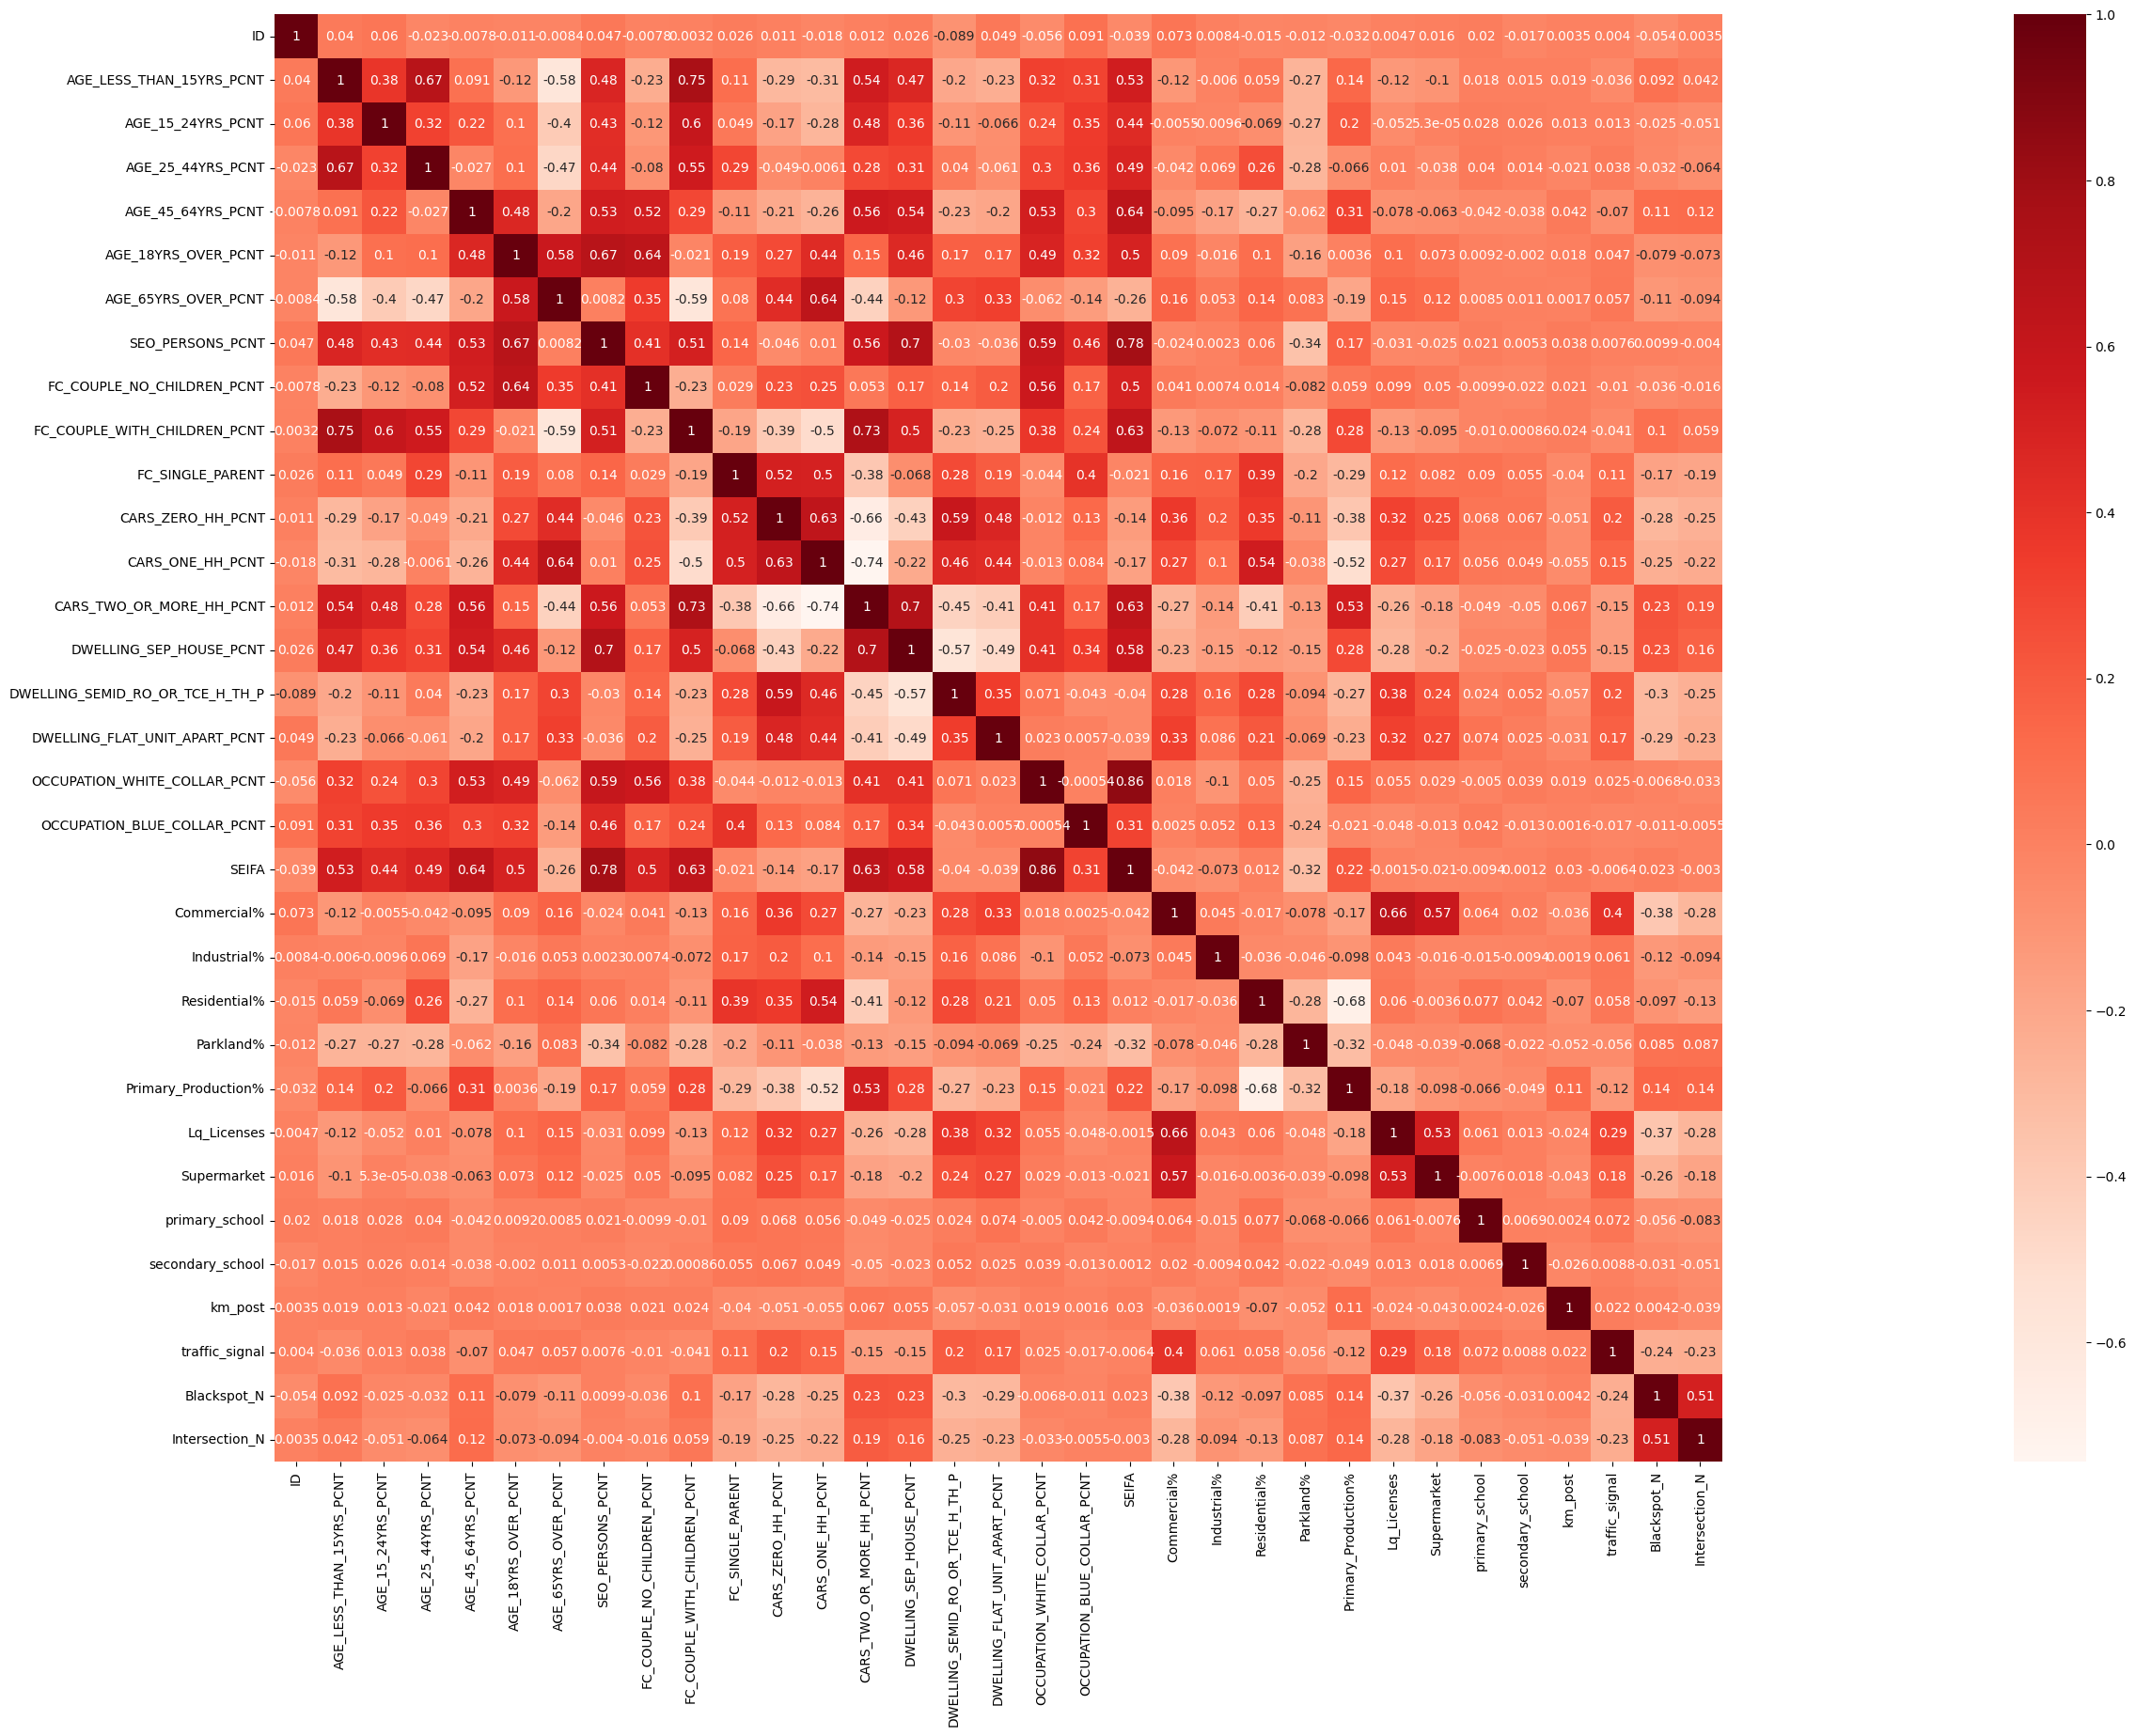

In [ ]:
#generating heatmaps to explore relationships
plt.figure(figsize=(80,20))
sns.heatmap(records_A1.corr(), square=True, cmap='Reds', annot=True)
plt.show()

In [ ]:
# Displying all the correalted values to the Target Value

target_column = 'Blackspot_N'

# Calculate the correlation matrix
correlation_matrix = records_A1.corr()

# Get the correlations of the target column with other columns
correlations_with_target = correlation_matrix[target_column]

# Find the top correlated columns (excluding the target column itself)
top_correlated_columns = correlations_with_target.drop(target_column).sort_values(ascending=False)

# Print the top correlated columns and their correlation values
print("Top correlated columns for", target_column)
print(top_correlated_columns)


Top correlated columns for Blackspot_N
Intersection_N                     0.511
CARS_TWO_OR_MORE_HH_PCNT           0.232
DWELLING_SEP_HOUSE_PCNT            0.228
Primary_Production%                0.142
AGE_45_64YRS_PCNT                  0.109
FC_COUPLE_WITH_CHILDREN_PCNT       0.100
AGE_LESS_THAN_15YRS_PCNT           0.092
Parkland%                          0.085
SEIFA                              0.023
SEO_PERSONS_PCNT                   0.010
km_post                            0.004
OCCUPATION_WHITE_COLLAR_PCNT      -0.007
OCCUPATION_BLUE_COLLAR_PCNT       -0.011
AGE_15_24YRS_PCNT                 -0.025
secondary_school                  -0.031
AGE_25_44YRS_PCNT                 -0.032
FC_COUPLE_NO_CHILDREN_PCNT        -0.036
ID                                -0.054
primary_school                    -0.056
AGE_18YRS_OVER_PCNT               -0.079
Residential%                      -0.097
AGE_65YRS_OVER_PCNT               -0.115
Industrial%                       -0.120
FC_SINGLE_PARENT  

<ipython-input-484-9653665ebb35>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = records_A1.corr()


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


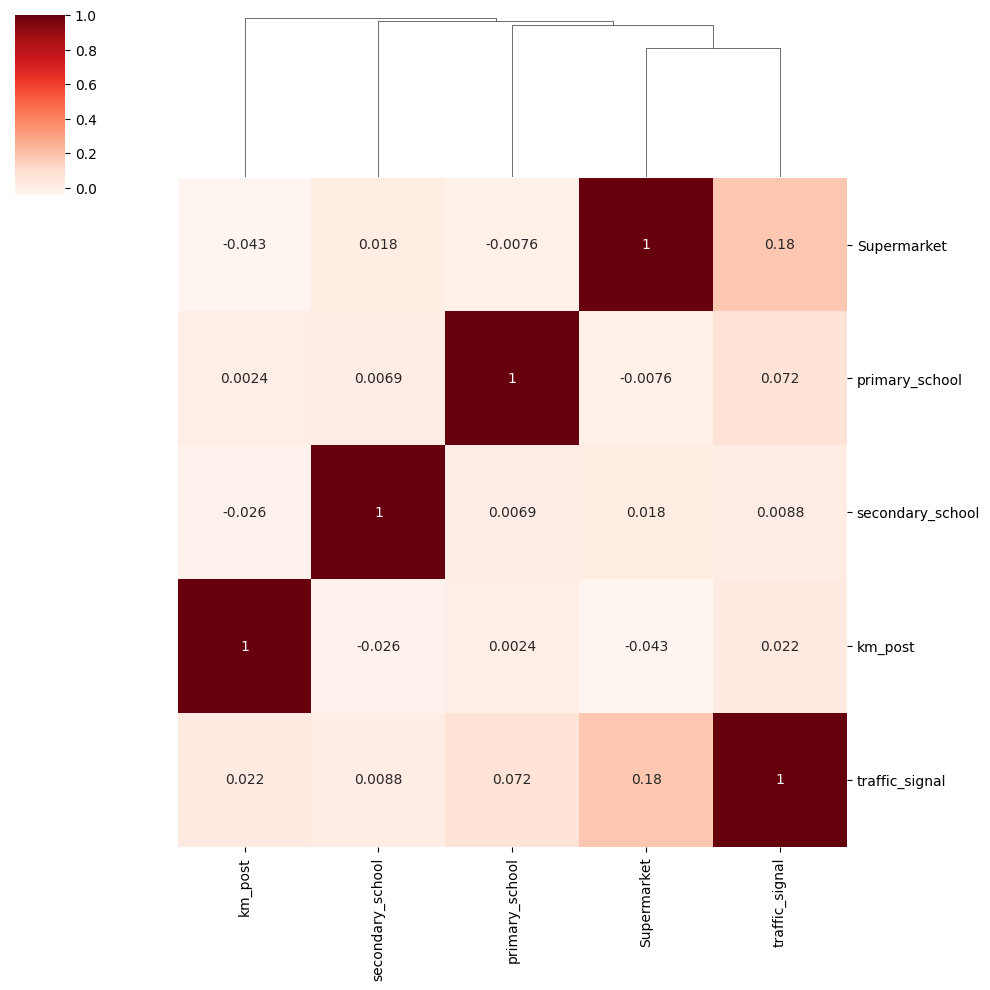

In [ ]:
#generating dendrograms to show hierarchical clustering

sns.clustermap(records_A1[numerical_variables].corr(), square=True, cmap='Reds', annot=True, row_cluster=False)
plt.show()

## **3. Machine learning model development**

In [ ]:
records_A1.columns

Index(['ID', 'EZI_ROAD_NAME', 'ROAD_NAME', 'ROAD_TYPE',
       'AGE_LESS_THAN_15YRS_PCNT', 'AGE_15_24YRS_PCNT', 'AGE_25_44YRS_PCNT',
       'AGE_45_64YRS_PCNT', 'AGE_18YRS_OVER_PCNT', 'AGE_65YRS_OVER_PCNT',
       'SEO_PERSONS_PCNT', 'FC_COUPLE_NO_CHILDREN_PCNT',
       'FC_COUPLE_WITH_CHILDREN_PCNT', 'FC_SINGLE_PARENT', 'CARS_ZERO_HH_PCNT',
       'CARS_ONE_HH_PCNT', 'CARS_TWO_OR_MORE_HH_PCNT',
       'DWELLING_SEP_HOUSE_PCNT', 'DWELLING_SEMID_RO_OR_TCE_H_TH_P',
       'DWELLING_FLAT_UNIT_APART_PCNT', 'OCCUPATION_WHITE_COLLAR_PCNT',
       'OCCUPATION_BLUE_COLLAR_PCNT', 'SEIFA', 'Commercial%', 'Industrial%',
       'Residential%', 'Parkland%', 'Primary_Production%', 'Lq_Licenses',
       'Intersection', 'Supermarket', 'primary_school', 'secondary_school',
       'km_post', 'traffic_signal', 'Blackspot', 'Blackspot_N',
       'Intersection_N'],
      dtype='object')

## **Selecting Features for the model and splitting dataset**

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split function

# Spliting dataset into training set 80% and test set 20%
features = ['Intersection_N',
'CARS_TWO_OR_MORE_HH_PCNT',
'DWELLING_SEP_HOUSE_PCNT','FC_COUPLE_WITH_CHILDREN_PCNT',
'AGE_45_64YRS_PCNT', 'Primary_Production%' ]
X = records_A1[features]
y = records_A1.Blackspot_N
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4260 entries, 3869 to 4951
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Intersection_N                4260 non-null   int64  
 1   CARS_TWO_OR_MORE_HH_PCNT      4260 non-null   float64
 2   DWELLING_SEP_HOUSE_PCNT       4260 non-null   float64
 3   FC_COUPLE_WITH_CHILDREN_PCNT  4260 non-null   float64
 4   AGE_45_64YRS_PCNT             4260 non-null   float64
 5   Primary_Production%           4260 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 233.0 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066 entries, 3578 to 2787
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Intersection_N                1066 non-null   int64  
 1   CARS_TWO_OR_MORE_HH_PCNT      1066 non-null   float64
 2   DWELLING_SEP

In [ ]:
#inspecting the split datasets
print(X_train.info())
print(X_test.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4260 entries, 3869 to 4951
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Intersection_N                4260 non-null   int64  
 1   CARS_TWO_OR_MORE_HH_PCNT      4260 non-null   float64
 2   DWELLING_SEP_HOUSE_PCNT       4260 non-null   float64
 3   FC_COUPLE_WITH_CHILDREN_PCNT  4260 non-null   float64
 4   AGE_45_64YRS_PCNT             4260 non-null   float64
 5   Primary_Production%           4260 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 233.0 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066 entries, 3578 to 2787
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Intersection_N                1066 non-null   int64  
 1   CARS_TWO_OR_MORE_HH_PCNT      1066 non-null   float64
 2   DWELLING_SEP

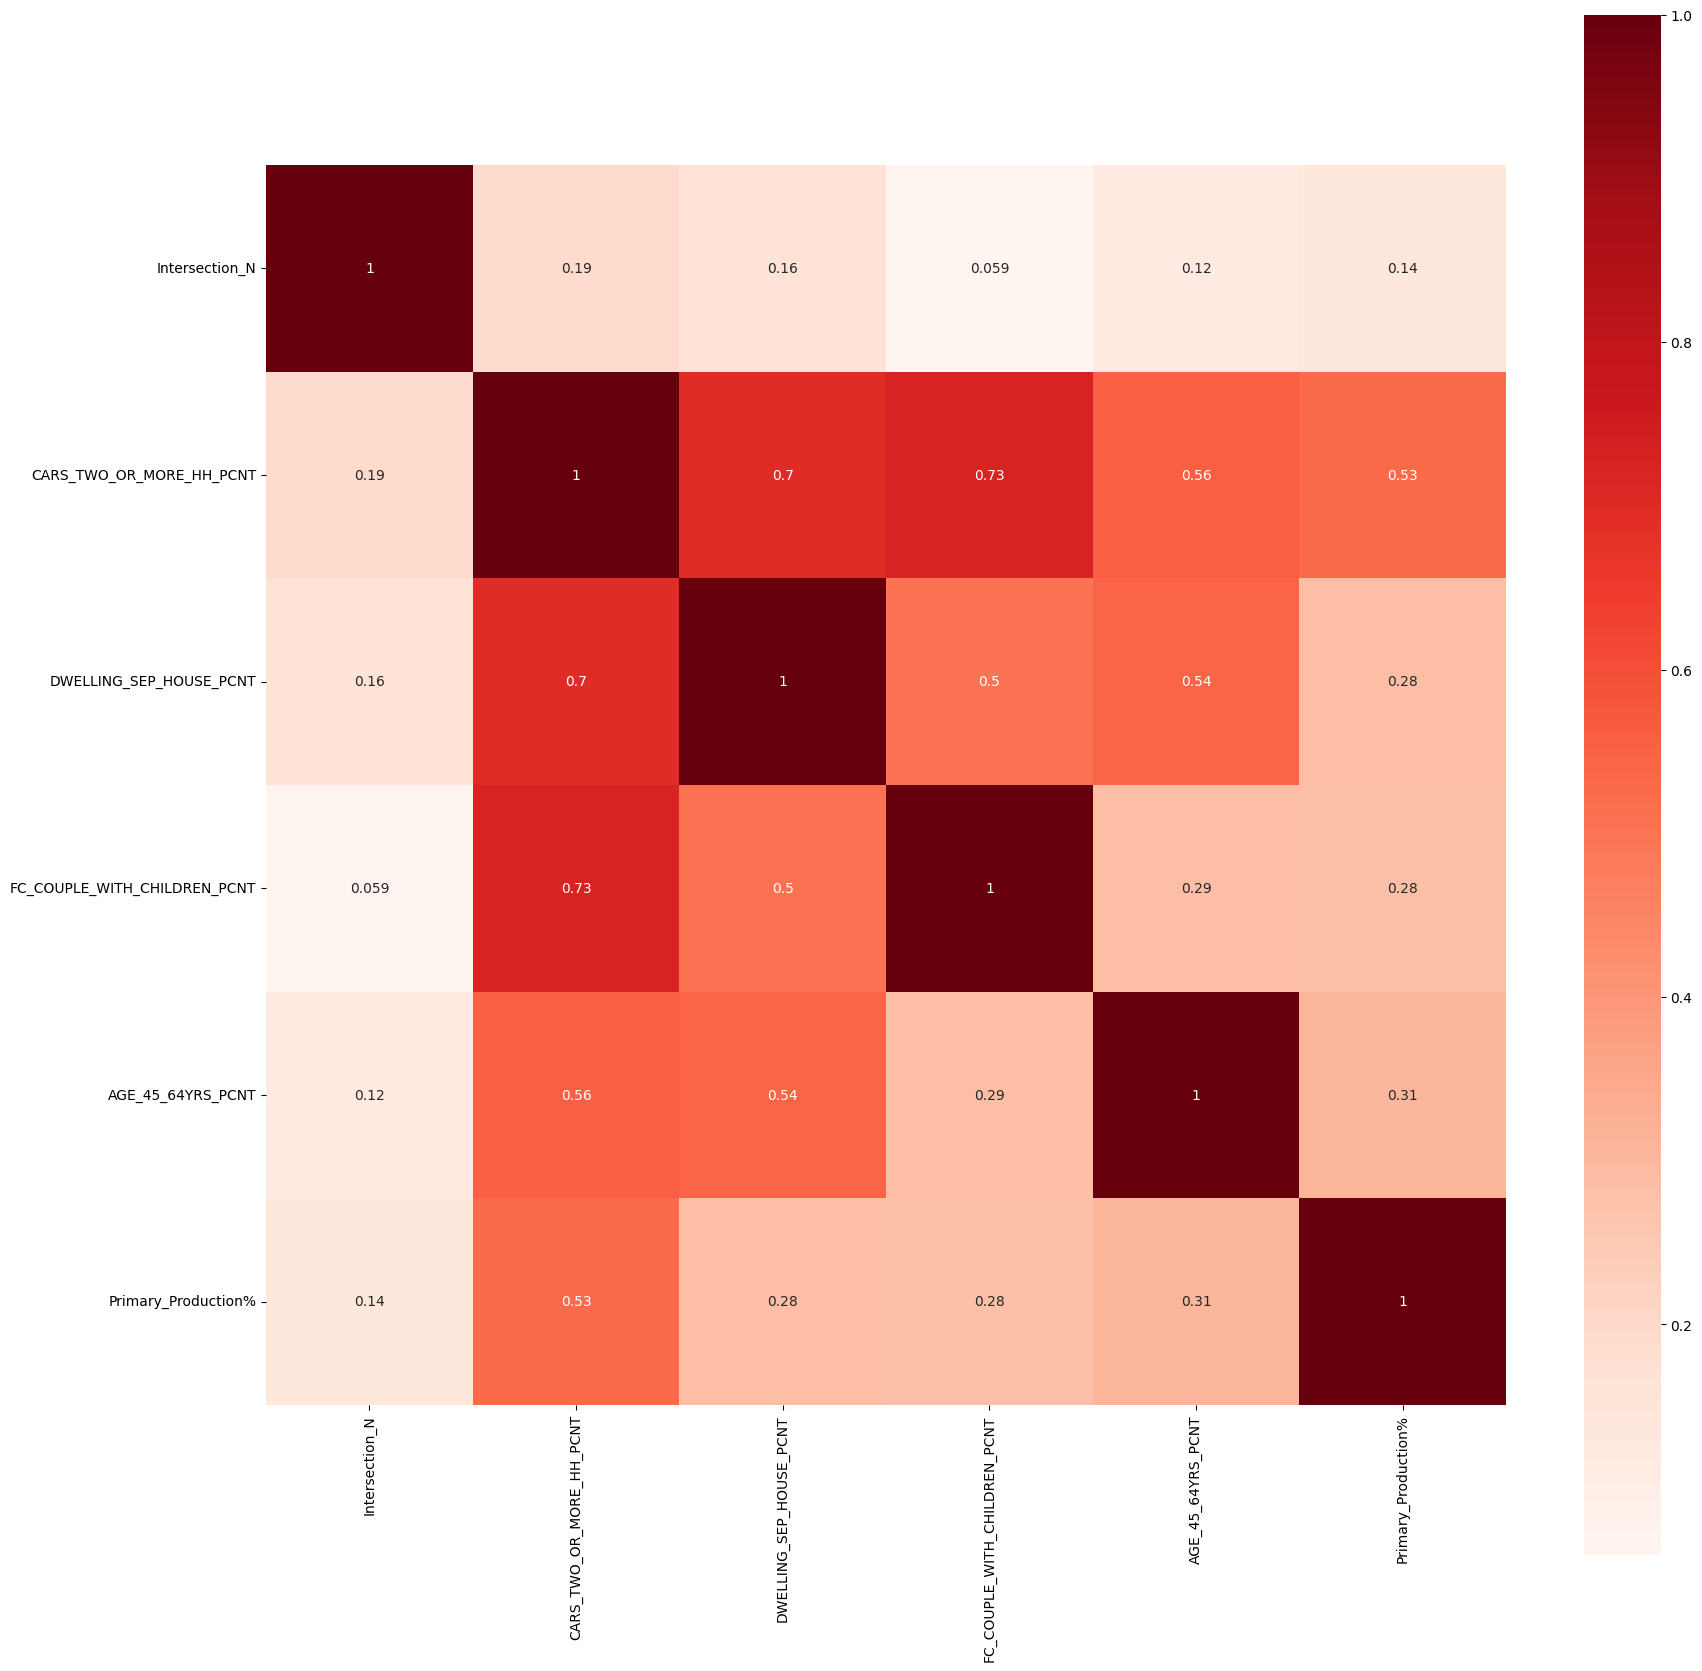

In [ ]:
## Heatmap displaying correlation among features

plt.figure(figsize=(20,20))
sns.heatmap(records_A1[features].corr(), square=True, cmap='Reds', annot=True)
plt.show()

## **Training the Logistic Regression Model**

In [ ]:
#Creating an initial Logistic Regression model
logreg = LogisticRegression(max_iter=100)

In [ ]:
# Completing the code to train Logistic Regression Classifer with the traning dataset
logreg = logreg.fit(X_train, y_train)

In [ ]:
#Completing the code to make predictions for the test dataset
y_pred = logreg.predict(X_test)

## **Inspecting Predictions**

In [ ]:
#joining unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

#join X_test with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

inspection.head(20)

,Intersection_N,CARS_TWO_OR_MORE_HH_PCNT,DWELLING_SEP_HOUSE_PCNT,FC_COUPLE_WITH_CHILDREN_PCNT,AGE_45_64YRS_PCNT,Primary_Production%,Actual,Predicted
3578,1,0.817,1.000,0.417,0.367,1.000,1,1
16,1,0.875,0.961,0.471,0.331,0.557,1,1
3466,0,0.813,1.000,0.585,0.312,0.000,1,1
1692,1,0.795,1.000,0.355,0.331,0.098,1,1
70,1,0.800,1.000,0.400,0.270,1.000,1,1
1806,1,0.767,1.000,0.444,0.353,1.000,1,1
4598,1,0.642,0.973,0.420,0.354,0.129,1,1
994,0,0.851,0.984,0.514,0.344,0.505,1,1
640,0,0.523,0.872,0.389,0.315,0.000,0,0
2590,1,0.362,0.796,0.339,0.228,0.000,1,1


## 4.Model evaluation   

In [ ]:
#calling metrics functions: Accuracy, Precision, Recall, F1 using the parameters y_test and y_pred
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print("F1: ", metrics.f1_score(y_test,y_pred))

Accuracy:  0.924953095684803
Precision:  0.933933933933934
Recall:  0.9852164730728616
F1:  0.9588900308324769


In [ ]:
#printing confusion matrix and evaluation report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[ 53  66]
 [ 14 933]]
              precision    recall  f1-score   support

           0       0.79      0.45      0.57       119
           1       0.93      0.99      0.96       947

    accuracy                           0.92      1066
   macro avg       0.86      0.72      0.76      1066
weighted avg       0.92      0.92      0.92      1066



In [ ]:
# getting the probabilities of the classes on the test set
probabilities = logreg.predict_proba(X_test)

In [ ]:
# The probabilities for the positive class (Blackspot)
y_prob = probabilities[:, 1]

**ROC (Receiver operating characteristic) curve and confusion matrix**

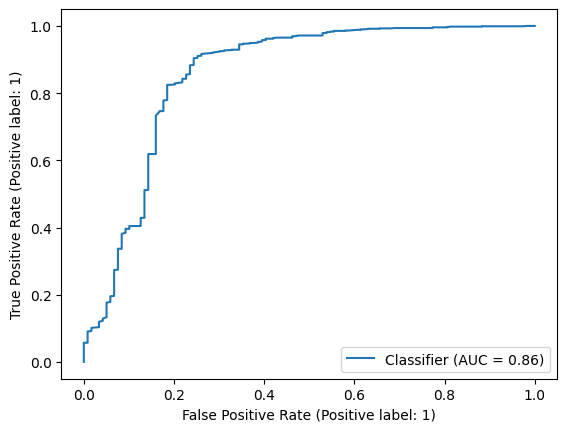

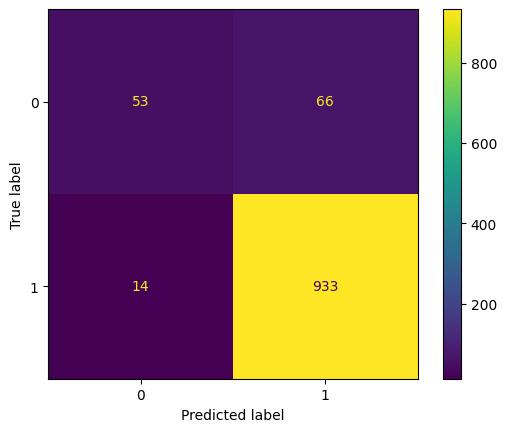

In [ ]:
#importing classes to display RocCurve and Confusion Matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay


RocCurveDisplay.from_predictions(y_test, y_prob)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

Axes(0.125,0.11;0.775x0.77)


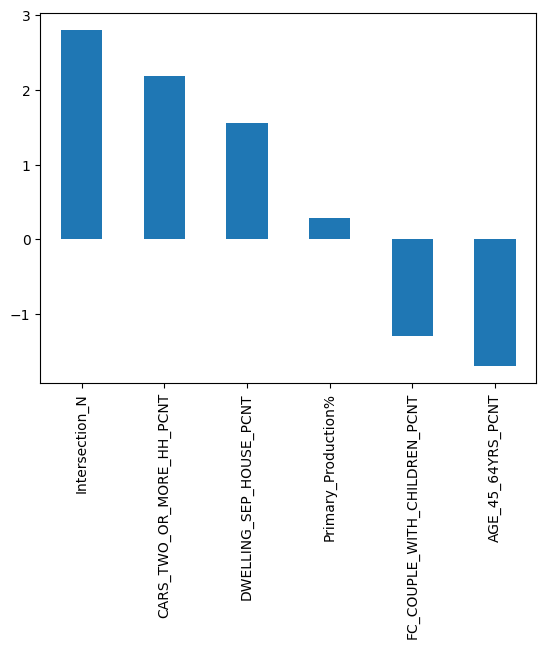

In [ ]:
#Visualising the coefficients
coefs = pd.Series(logreg.coef_[0], index=X.columns.values)
print (coefs.sort_values(ascending = False).plot(kind='bar'))